In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
flight_dframe = sns.load_dataset('flights')

In [3]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [4]:
flight_dframe = flight_dframe.pivot('month','year','passengers') #pivot(rows,columns,values)

In [5]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417
July,148,170,199,230,264,302,364,413,465,491,548,622
June,135,149,178,218,243,264,315,374,422,435,472,535
March,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


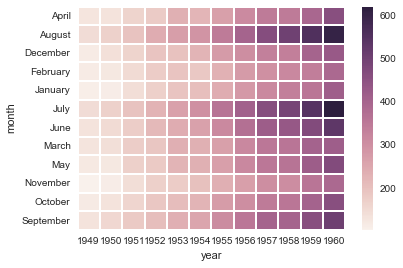

In [6]:
sns.heatmap(flight_dframe)

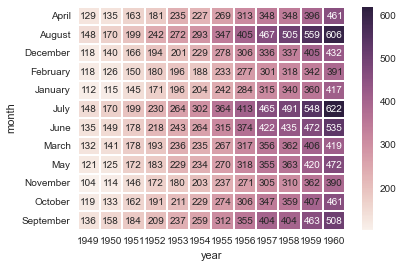

In [8]:
sns.heatmap(flight_dframe, annot=True,fmt='d')

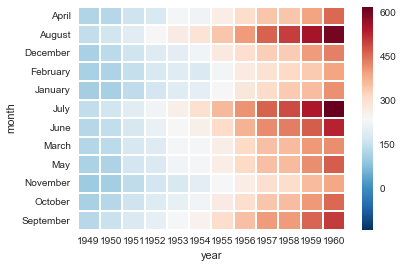

In [9]:
sns.heatmap(flight_dframe, center = flight_dframe.loc['January',1955])

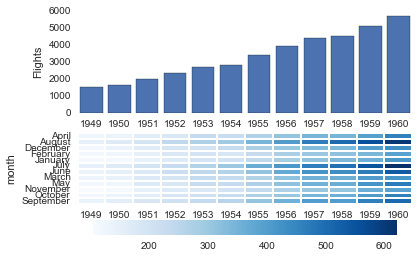

In [12]:
f, (axis1,axis2) = plt.subplots(2,1)

yearly_flights = flight_dframe.sum()

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years,flights), axis = 1)
year_dframe.columns = ['Year','Flights']

sns.barplot('Year',y='Flights',data=year_dframe,ax=axis1)

sns.heatmap(flight_dframe, cmap='Blues',ax=axis2,cbar_kws={'orientation':'horizontal'})

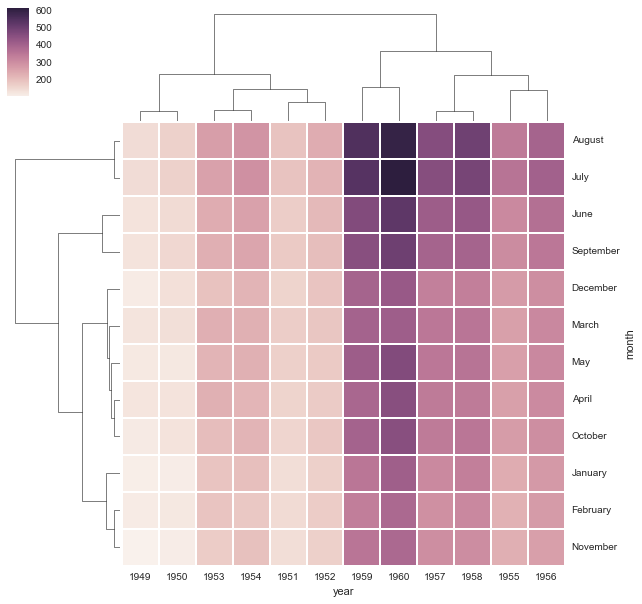

In [13]:
# Finally we'll learn about using a clustermap

# Clustermap will reformat the heatmap so similar rows are next to each other
sns.clustermap(flight_dframe)

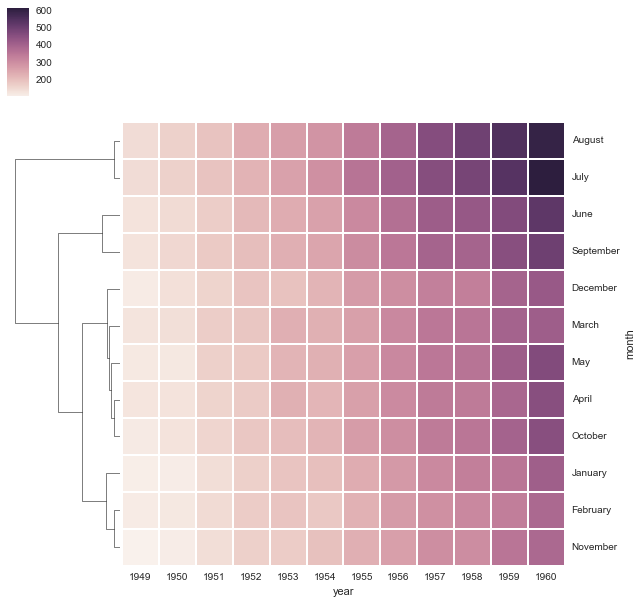

In [14]:
# Let's uncluster the columns
sns.clustermap(flight_dframe, col_cluster = False)

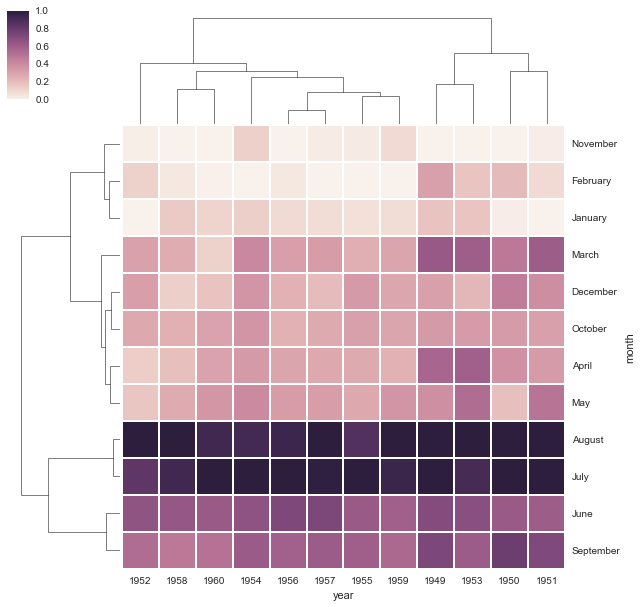

In [15]:
# Since the number of flights increase every year, we should set a standard scale
sns.clustermap(flight_dframe,standard_scale=1) # standardize by columns (year)

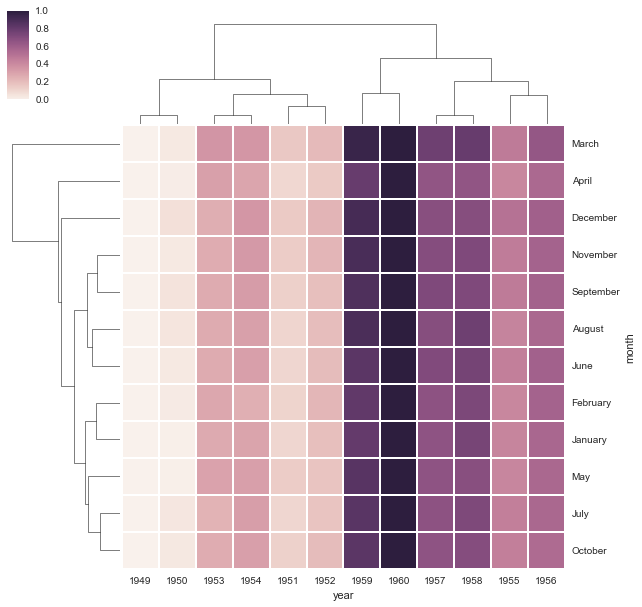

In [19]:
# Or scale the rows
sns.clustermap(flight_dframe, standard_scale = 0)

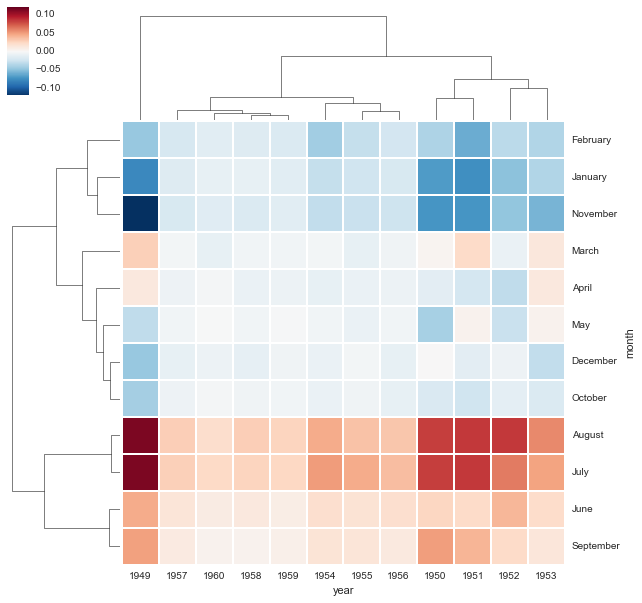

In [20]:
sns.clustermap(flight_dframe, z_score=1)